1. 나만의 데이터 셋 준비
2. torchvision.datasets.ImageFolder로 불러오기
3. transforms 적용하여 저장 

In [21]:
import torchvision
from torchvision import transforms

from torch.utils.data import DataLoader
import torch.optim as optim

import torch
import torch.nn as nn
import torch.nn.functional as F



In [2]:
from matplotlib.pyplot import imshow
%matplotlib inline

In [36]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

torch.manual_seed(777)
if device =='cuda':
    torch.cuda.manual_seed_all(777)

In [50]:
trans = transforms.Compose([
    transforms.Resize((64,128)),
    transforms.ToTensor() # 텐서로 바꿔야 학습에 사용가능 
])

In [51]:
!ls Dog_Images/

n02085620-Chihuahua
n02085782-Japanese_spaniel
n02085936-Maltese_dog
n02086079-Pekinese
n02086240-Shih-Tzu
n02086646-Blenheim_spaniel
n02086910-papillon
n02087046-toy_terrier
n02087394-Rhodesian_ridgeback
n02088094-Afghan_hound
n02088238-basset
n02088364-beagle
n02088466-bloodhound
n02088632-bluetick
n02089078-black-and-tan_coonhound
n02089867-Walker_hound
n02089973-English_foxhound
n02090379-redbone
n02090622-borzoi
n02090721-Irish_wolfhound
n02091032-Italian_greyhound
n02091134-whippet
n02091244-Ibizan_hound
n02091467-Norwegian_elkhound
n02091635-otterhound
n02091831-Saluki
n02092002-Scottish_deerhound
n02092339-Weimaraner
n02093256-Staffordshire_bullterrier
n02093428-American_Staffordshire_terrier
n02093647-Bedlington_terrier
n02093754-Border_terrier
n02093859-Kerry_blue_terrier
n02093991-Irish_terrier
n02094114-Norfolk_terrier
n02094258-Norwich_terrier
n02094433-Yorkshire_terrier
n02095314-wire-haired_fox_terrier
n02095570-Lakeland_terrier
n02095889-Sealyham_terrier
n02096051-Aired

In [52]:
train_data = torchvision.datasets.ImageFolder(root = "Dog_Images/", transform=trans)

0 tensor([[[0.0353, 0.0235, 0.0157,  ..., 0.3529, 0.4784, 0.5098],
         [0.0353, 0.0314, 0.0196,  ..., 0.3882, 0.3569, 0.3922],
         [0.0353, 0.0353, 0.0314,  ..., 0.3647, 0.3608, 0.3725],
         ...,
         [1.0000, 1.0000, 1.0000,  ..., 0.0275, 0.0314, 0.0275],
         [1.0000, 1.0000, 1.0000,  ..., 0.0275, 0.0314, 0.0275],
         [1.0000, 1.0000, 1.0000,  ..., 0.0275, 0.0235, 0.0235]],

        [[0.0314, 0.0275, 0.0314,  ..., 0.4549, 0.5843, 0.6039],
         [0.0353, 0.0392, 0.0353,  ..., 0.4588, 0.4431, 0.4863],
         [0.0353, 0.0431, 0.0392,  ..., 0.4235, 0.4314, 0.4549],
         ...,
         [1.0000, 1.0000, 1.0000,  ..., 0.0275, 0.0314, 0.0275],
         [1.0000, 1.0000, 1.0000,  ..., 0.0275, 0.0314, 0.0275],
         [1.0000, 1.0000, 1.0000,  ..., 0.0275, 0.0235, 0.0235]],

        [[0.0510, 0.0392, 0.0314,  ..., 0.2549, 0.3882, 0.4157],
         [0.0431, 0.0431, 0.0275,  ..., 0.2118, 0.1686, 0.1922],
         [0.0353, 0.0353, 0.0275,  ..., 0.1216, 0.1059, 

TypeError: Invalid shape (3, 128, 128) for image data

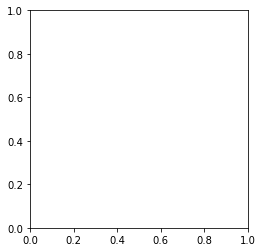

In [25]:
# tensor 가 아닐때 출력해서 확인할수 있음
for num, value in enumerate(train_data) :
    data, label = value
    print(num, data, label)
    
    imshow(data)
    break

In [53]:
data_loader = DataLoader(dataset = train_data, batch_size = 8, shuffle = True)

In [61]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Conv2d(3,6,5),    # i_c,o_c,kernelsize = 3,6,5
            nn.ReLU(),
            nn.MaxPool2d(2),
        )
        self.layer2 = nn.Sequential(
            nn.Conv2d(6,16,5),
            nn.ReLU(),
            nn.MaxPool2d(2),
        )
        self.layer3 = nn.Sequential(
            nn.Linear(16*13*29, 120),
            nn.ReLU(),
            nn.Linear(120,120)
        )
        
    def forward(self, x):
        out = self.layer1(x)
#         print(out.shape)
        out = self.layer2(out)
#         print(out.shape)
        out = out.view(out.shape[0], -1)
#         print(out.shape)
        out = self.layer3(out)
        return out

In [79]:
net = CNN()
test_input = (torch.Tensor(3,3,64,128)).to(device)
test_out = net(test_input)

In [63]:
16*13*29

6032

In [89]:
optimizer = optim.Adam(net.parameters(), lr = 0.00005)
loss_func = nn.CrossEntropyLoss().to(device)

In [90]:
total_batch = len(data_loader)

epochs = 10
for epoch in range(epochs) :
    avg_cost = 0.0
    for num,data in enumerate(data_loader) :
        imgs, labels = data
        imgs = imgs.to(device)
        labels = labels.to(device)
        optimizer.zero_grad()
        out = net(imgs)
        loss = loss_func(out, labels)
        loss.backward()
        optimizer.step()
        
        avg_cost += loss / total_batch
        
    print('[Epoch:{}] cost = {}'.format(epoch+1, avg_cost))
print('Learning Finished!')

[Epoch:1] cost = 4.785822868347168
[Epoch:2] cost = 4.785381317138672
[Epoch:3] cost = 4.784940719604492
[Epoch:4] cost = 4.784607410430908
[Epoch:5] cost = 4.784209251403809
[Epoch:6] cost = 4.783833980560303
[Epoch:7] cost = 4.783501148223877
[Epoch:8] cost = 4.78322172164917
[Epoch:9] cost = 4.782961845397949
[Epoch:10] cost = 4.782684803009033
Learning Finished!


In [91]:
# 학습시킨 모델을 저장해놓는 방법, 불필요한 학습을 줄일 수 있다 
torch.save(net.state_dict(),"Dog_Images/model.pth")

In [92]:
new_net = CNN().to(device)

In [93]:
new_net.load_state_dict(torch.load("Dog_Images/model.pth"))

<All keys matched successfully>

In [94]:
print(net.layer1[0])
print(new_net.layer1[0])

print(net.layer1[0].weight[0][0][0])
print(new_net.layer1[0].weight[0][0][0])

net.layer1[0].weight[0] == new_net.layer1[0].weight[0]

Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
tensor([ 0.0160, -0.0453,  0.0408,  0.0486, -0.1033], grad_fn=<SelectBackward>)
tensor([ 0.0160, -0.0453,  0.0408,  0.0486, -0.1033], grad_fn=<SelectBackward>)


tensor([[[True, True, True, True, True],
         [True, True, True, True, True],
         [True, True, True, True, True],
         [True, True, True, True, True],
         [True, True, True, True, True]],

        [[True, True, True, True, True],
         [True, True, True, True, True],
         [True, True, True, True, True],
         [True, True, True, True, True],
         [True, True, True, True, True]],

        [[True, True, True, True, True],
         [True, True, True, True, True],
         [True, True, True, True, True],
         [True, True, True, True, True],
         [True, True, True, True, True]]])

In [95]:
trans=torchvision.transforms.Compose([
    transforms.Resize((64,128)),
    transforms.ToTensor()
])
test_data = torchvision.datasets.ImageFolder(root="Dog_Images/", transform=trans)

In [96]:
test_set = DataLoader(dataset = test_data, batch_size = len(test_data))

In [97]:
with torch.no_grad():
    for num, data in enumerate(test_set):
        imgs, label = data
        imgs = imgs.to(device)
        label = label.to(device)
        
        prediction = net(imgs)
        
        correct_prediction = torch.argmax(prediction, 1) == label
        
        accuracy = correct_prediction.float().mean()
        print('Accuracy:', accuracy.item())

Accuracy: 0.01224489789456129
